In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder

In [92]:
from ISLP import load_data

In [93]:
car = load_data('carseats')

In [94]:
car.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [95]:
car['Y'] = (car['Sales'] >= 8).astype(int)

In [96]:
car['ShelveLoc_enc'] = LabelEncoder().fit_transform(car['ShelveLoc'])
car['Urban_enc'] = LabelEncoder().fit_transform(car['Urban'])
car['US_enc'] = LabelEncoder().fit_transform(car['US'])

In [97]:
car.drop(['Sales','ShelveLoc','Urban', 'US'], axis=1, inplace=True)

In [98]:
car.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,Y,ShelveLoc_enc,Urban_enc,US_enc
0,138,73,11,276,120,42,17,1,0,1,1
1,111,48,16,260,83,65,10,1,1,1,1
2,113,35,10,269,80,59,12,1,2,1,1
3,117,100,4,466,97,55,14,0,2,1,1
4,141,64,3,340,128,38,13,0,0,1,0


In [99]:
Y = car['Y']
X = car.drop(['Y'], axis=1)

In [100]:
X.shape, Y.shape

((400, 10), (400,))

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=40)

In [102]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((300, 10), (100, 10), (300,), (100,))

In [103]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [104]:
print('Results for the fitted DTree')
trn_acc = dt.score(X_train,y_train)
tst_acc = dt.score(X_test,y_test)
print('Train Acc: ', trn_acc)
print('test Acc: ', tst_acc)

Results for the fitted DTree
Train Acc:  1.0
test Acc:  0.73


In [105]:
# plt.figure(figsize=(15,15))
# print(plot_tree(dt, filled=True, fontsize=5))

In [106]:
dt.tree_.max_depth, dt.tree_.node_count

(10, 109)

In [107]:
path = dt.cost_complexity_pruning_path(X_train, y_train)

In [108]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0, 0.5, 'Impurities')

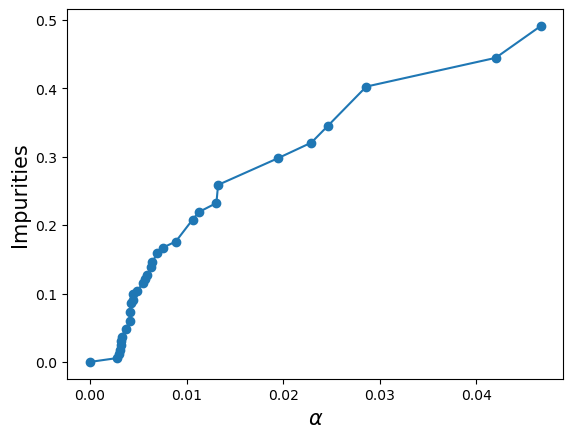

In [109]:
plt.plot(ccp_alphas, impurities, marker = 'o')
plt.xlabel(r'$\alpha$', fontsize = 15)
plt.ylabel('Impurities', fontsize = 15)

In [110]:
ccp_alphas

array([0.        , 0.00277778, 0.003     , 0.00307692, 0.00316667,
       0.00324786, 0.00327044, 0.0037037 , 0.00411523, 0.00415304,
       0.00421053, 0.00444444, 0.00444444, 0.00490909, 0.00545455,
       0.00573016, 0.00591803, 0.00636169, 0.00646465, 0.0069697 ,
       0.00755245, 0.00888889, 0.01061752, 0.01128205, 0.01309091,
       0.01326522, 0.01944883, 0.02292407, 0.02464103, 0.02860867,
       0.04200003, 0.04667972])

In [111]:
ccp_alphas = np.unique(ccp_alphas)

In [112]:
ccp_alphas = ccp_alphas[:-1]

In [113]:
clfs = []
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=alpha, random_state=0)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [114]:
# Average CV accuracy results on the train set
cv_scores = [np.mean(cross_val_score(clf, X_train, y_train, cv=5)) for clf in clfs]

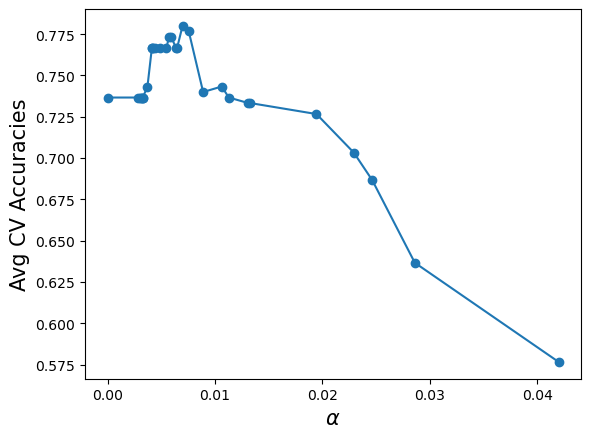

In [115]:
plt.plot(ccp_alphas, cv_scores, marker='o')
plt.xlabel(r'$\alpha$', fontsize = 15)
plt.ylabel('Avg CV Accuracies', fontsize = 15)
plt.show()

In [128]:
ccp_alphas[np.argmax(cv_scores)]

0.006969696969696968

In [129]:
ccp_alphas

array([0.        , 0.00277778, 0.003     , 0.00307692, 0.00316667,
       0.00324786, 0.00327044, 0.0037037 , 0.00411523, 0.00415304,
       0.00421053, 0.00444444, 0.00490909, 0.00545455, 0.00573016,
       0.00591803, 0.00636169, 0.00646465, 0.0069697 , 0.00755245,
       0.00888889, 0.01061752, 0.01128205, 0.01309091, 0.01326522,
       0.01944883, 0.02292407, 0.02464103, 0.02860867, 0.04200003])

In [130]:
best_tree = DecisionTreeClassifier(ccp_alpha=0.006970, random_state=0)
best_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.00697, random_state=0)

In [131]:
print('Results for the final fitted DTree')
trn_acc = best_tree.score(X_train,y_train)
tst_acc = best_tree.score(X_test,y_test)
print('Train Acc: ', trn_acc)
print('test Acc: ', tst_acc)

Results for the final fitted DTree
Train Acc:  0.9033333333333333
test Acc:  0.76


In [132]:
best_tree.tree_.max_depth, best_tree.tree_.node_count

(7, 35)

In [133]:
node_counts = [clf.tree_.node_count for clf in clfs]
depths = [clf.tree_.max_depth for clf in clfs]

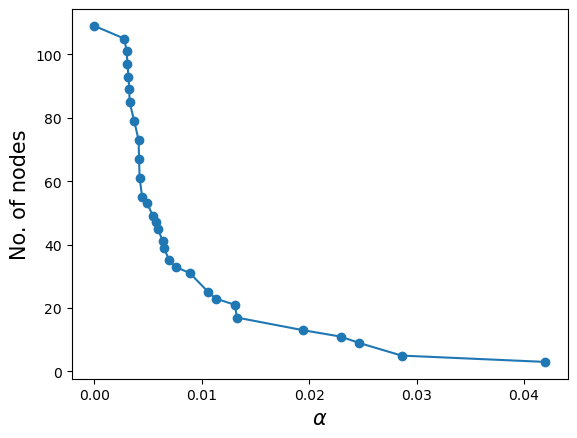

In [134]:
plt.plot(ccp_alphas, node_counts, marker='o')
plt.xlabel(r'$\alpha$', fontsize = 15)
plt.ylabel('No. of nodes', fontsize = 15)
plt.show()

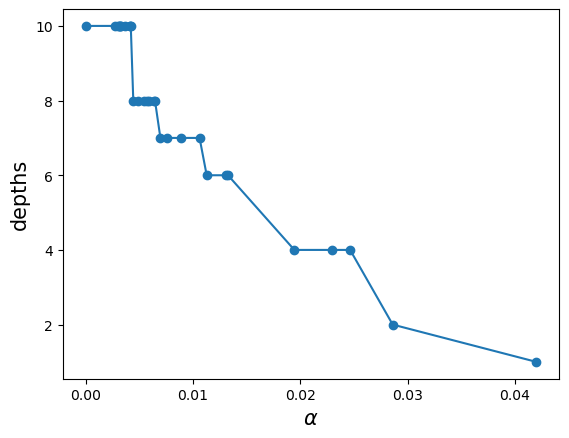

In [135]:
plt.plot(ccp_alphas, depths, marker='o')
plt.xlabel(r'$\alpha$', fontsize = 15)
plt.ylabel('depths', fontsize = 15)
plt.show()

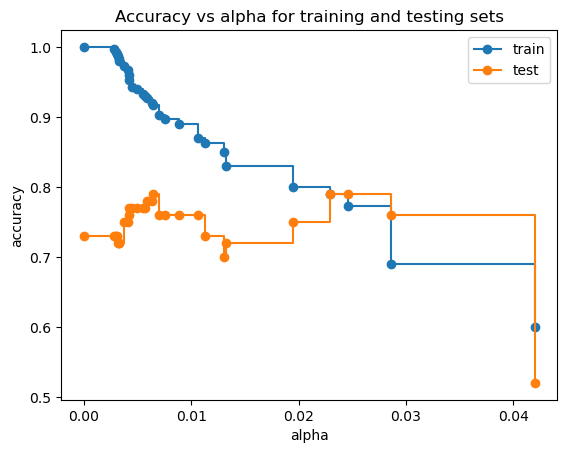

In [136]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.title("Accuracy vs alpha for training and testing sets")
plt.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
plt.legend()
plt.show()

In [137]:
pd.DataFrame({'Train acc': train_scores,
               'Test acc': test_scores,
               'Nodes': node_counts,
               'Depth': depths,
               'ccp_alphas': ccp_alphas,
               'CV_acc': cv_scores})

,Train acc,Test acc,Nodes,Depth,ccp_alphas,CV_acc
0,1.000000,0.73,109,10,0.000000,0.736667
1,0.996667,0.73,105,10,0.002778,0.736667
2,0.993333,0.73,101,10,0.003000,0.736667
3,0.990000,0.73,97,10,0.003077,0.736667
4,0.986667,0.72,93,10,0.003167,0.736667
5,0.983333,0.72,89,10,0.003248,0.736667
6,0.980000,0.72,85,10,0.003270,0.736667
7,0.973333,0.75,79,10,0.003704,0.743333
8,0.966667,0.75,73,10,0.004115,0.766667
9,0.960000,0.76,67,10,0.004153,0.766667


## Logistic regression

In [138]:
from sklearn.linear_model import LogisticRegression

In [141]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [142]:
model.score(X_train,y_train)

0.8133333333333334

In [143]:
model.score(X_test,y_test)

0.85